
# Assignment No 4d
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of Conic weak learner based Random Forest.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

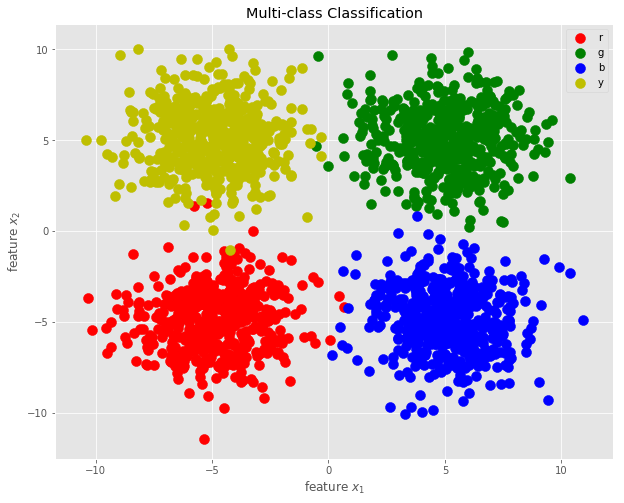

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))

In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Conic')

In [7]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [8]:
rfc.train(X,Y)

Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decision tree 5
Train Decision tree 6
Train Decision tree 7
Train Decision tree 8
Train Decision tree 9
Train Decision tree 10


In [9]:
len(rfc.trees)

10

In [10]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned ON
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,497,0,1,2,500
2.0,0,493,3,4,500
3.0,6,5,489,0,500
4.0,1,2,0,497,500
All,504,500,493,503,2000


In [11]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

In [12]:
print acc

0.988


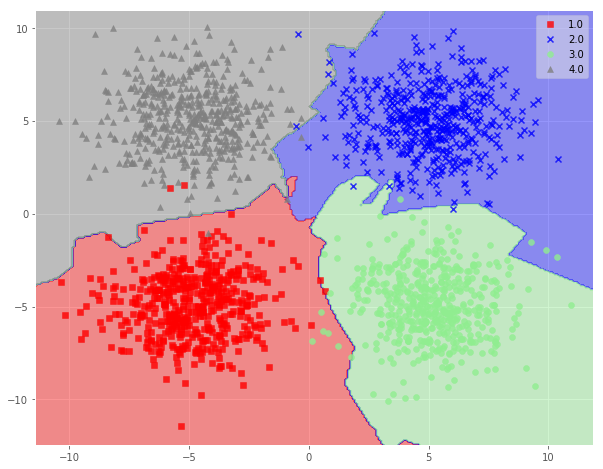

In [13]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [14]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,250,0,0,0,250
2.0,0,245,4,1,250
3.0,6,1,243,0,250
4.0,1,2,0,247,250
All,257,248,247,248,1000


In [15]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

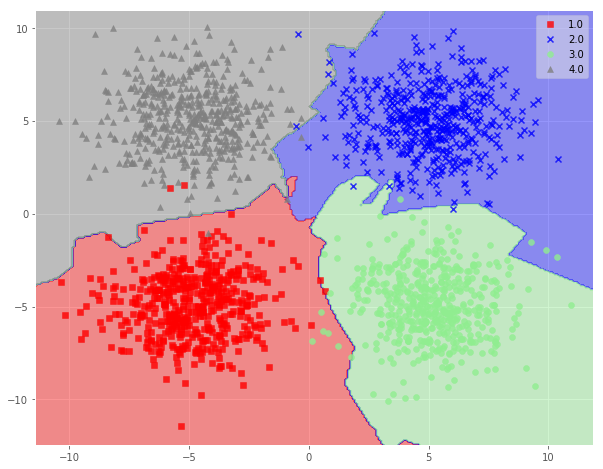

In [16]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

In [17]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
import tools as t

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


tools.py:844: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


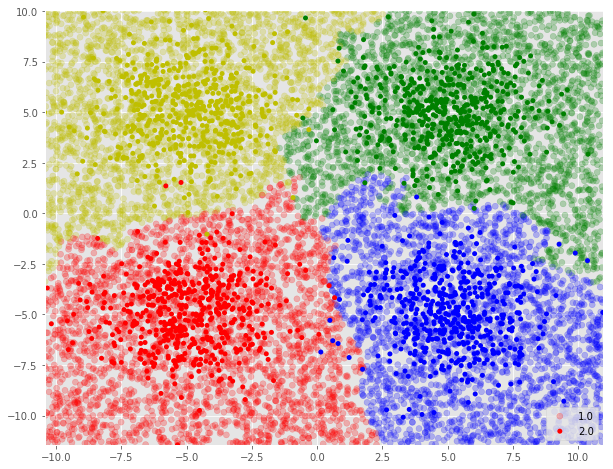

In [18]:
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned OFF


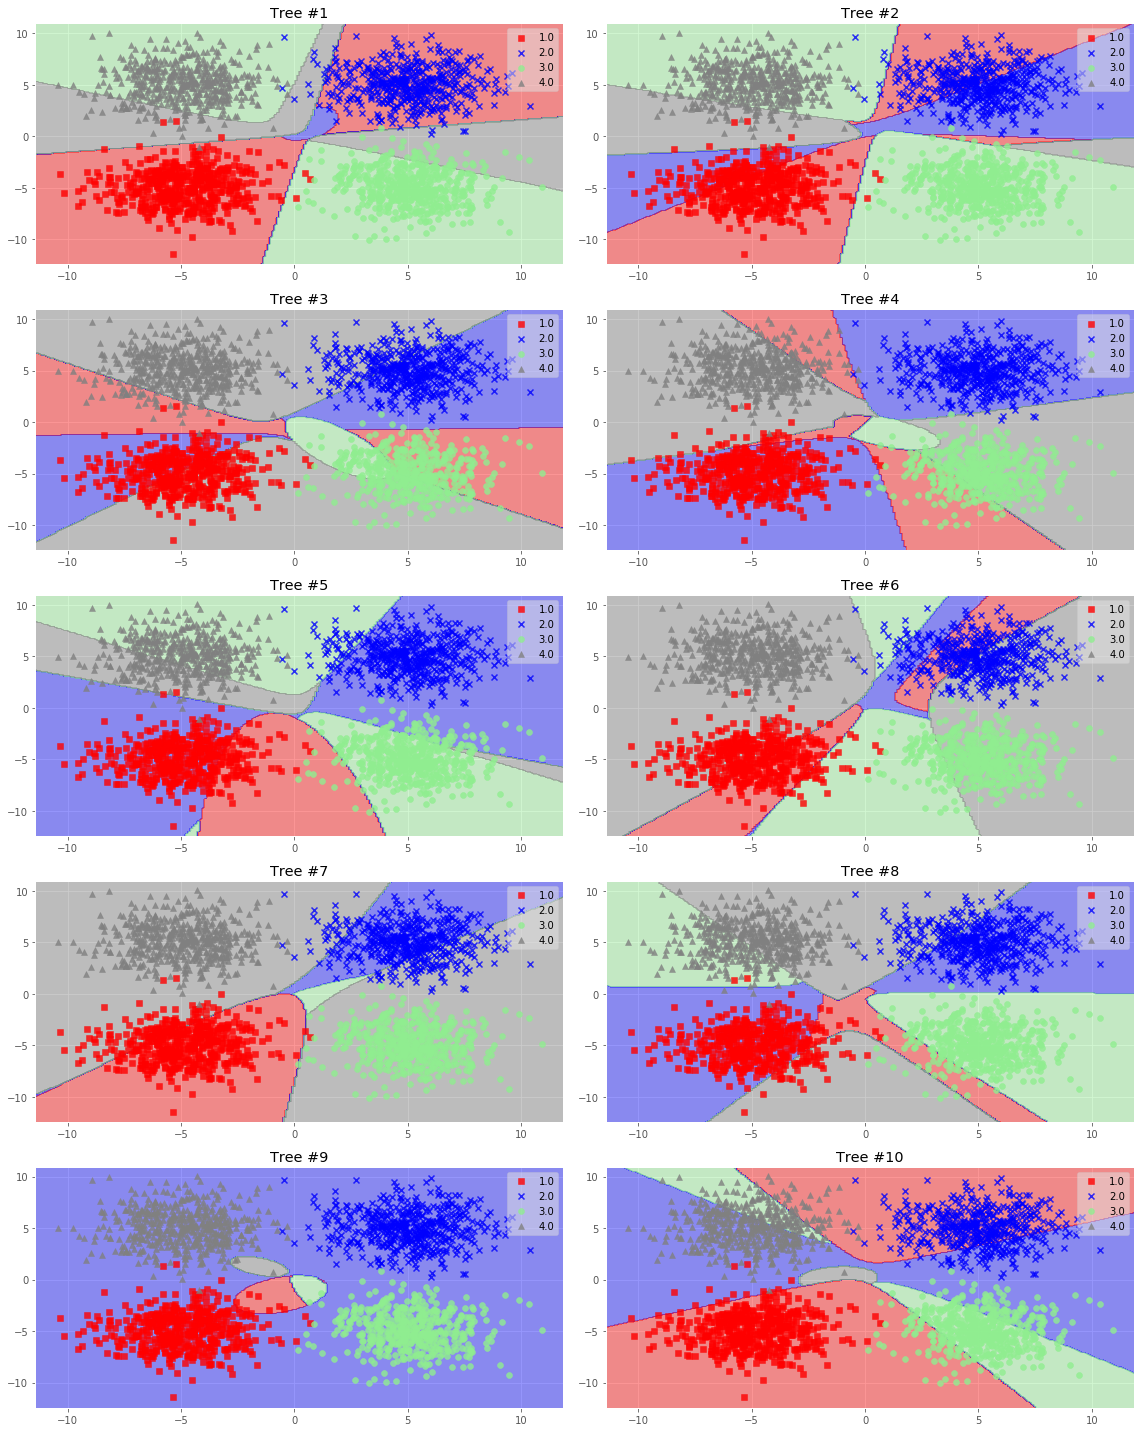

In [19]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2 
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i+1))
    i=i+1
plt.tight_layout()

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

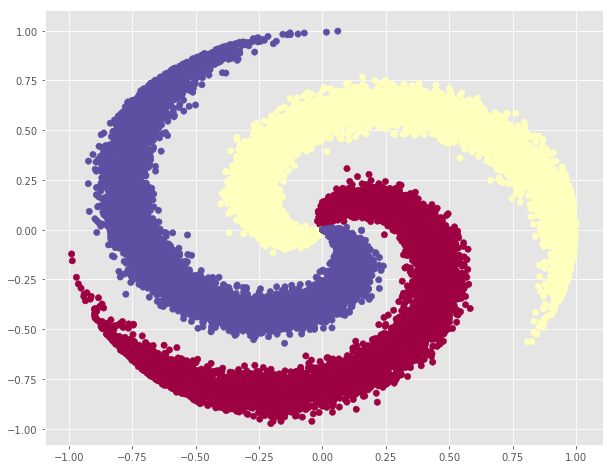

In [20]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [21]:
print X.shape, Y.shape

(30000, 2) (30000,)


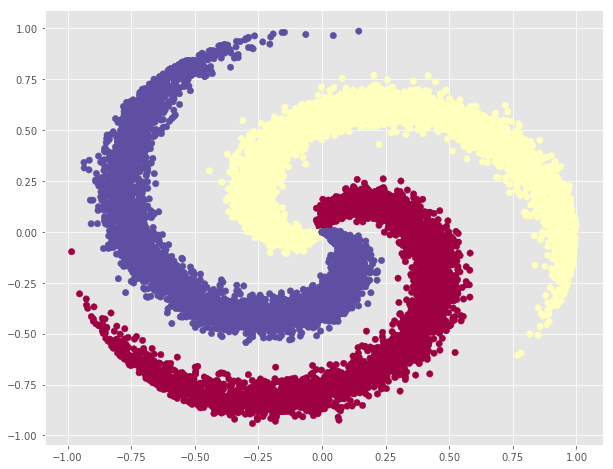

In [22]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [23]:
rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decision tree 5
Train Decision tree 6
Train Decision tree 7
Train Decision tree 8
Train Decision tree 9
Train Decision tree 10
Train Decision tree 11
Train Decision tree 12
Train Decision tree 13
Train Decision tree 14
Train Decision tree 15
Train Decision tree 16
Train Decision tree 17
Train Decision tree 18
Train Decision tree 19
Train Decision tree 20


In [24]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9843,7,150,10000
1,245,9755,0,10000
2,252,214,9534,10000
All,10340,9976,9684,30000


In [25]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4915,3,82,5000
1,125,4875,0,5000
2,123,108,4769,5000
All,5163,4986,4851,15000


In [26]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0, 1, 2]


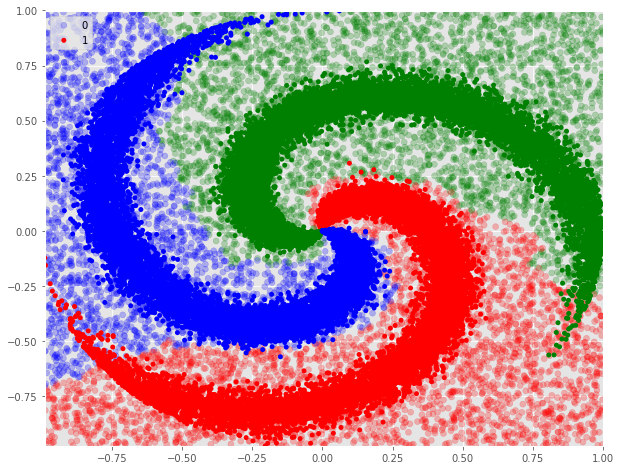

In [27]:
t.plot_points_range(rfc,X,Y)

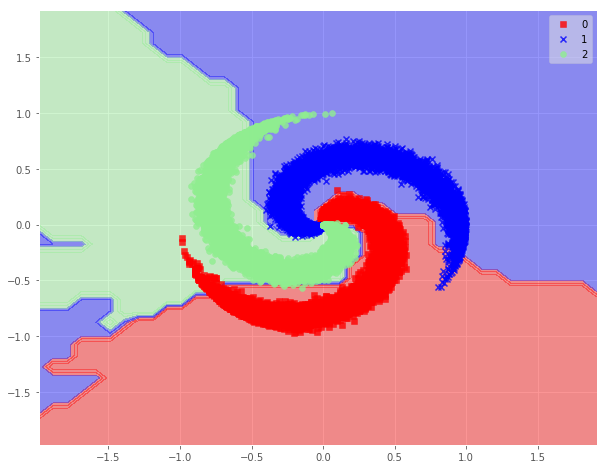

In [28]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned ON


<function matplotlib.pyplot.tight_layout>

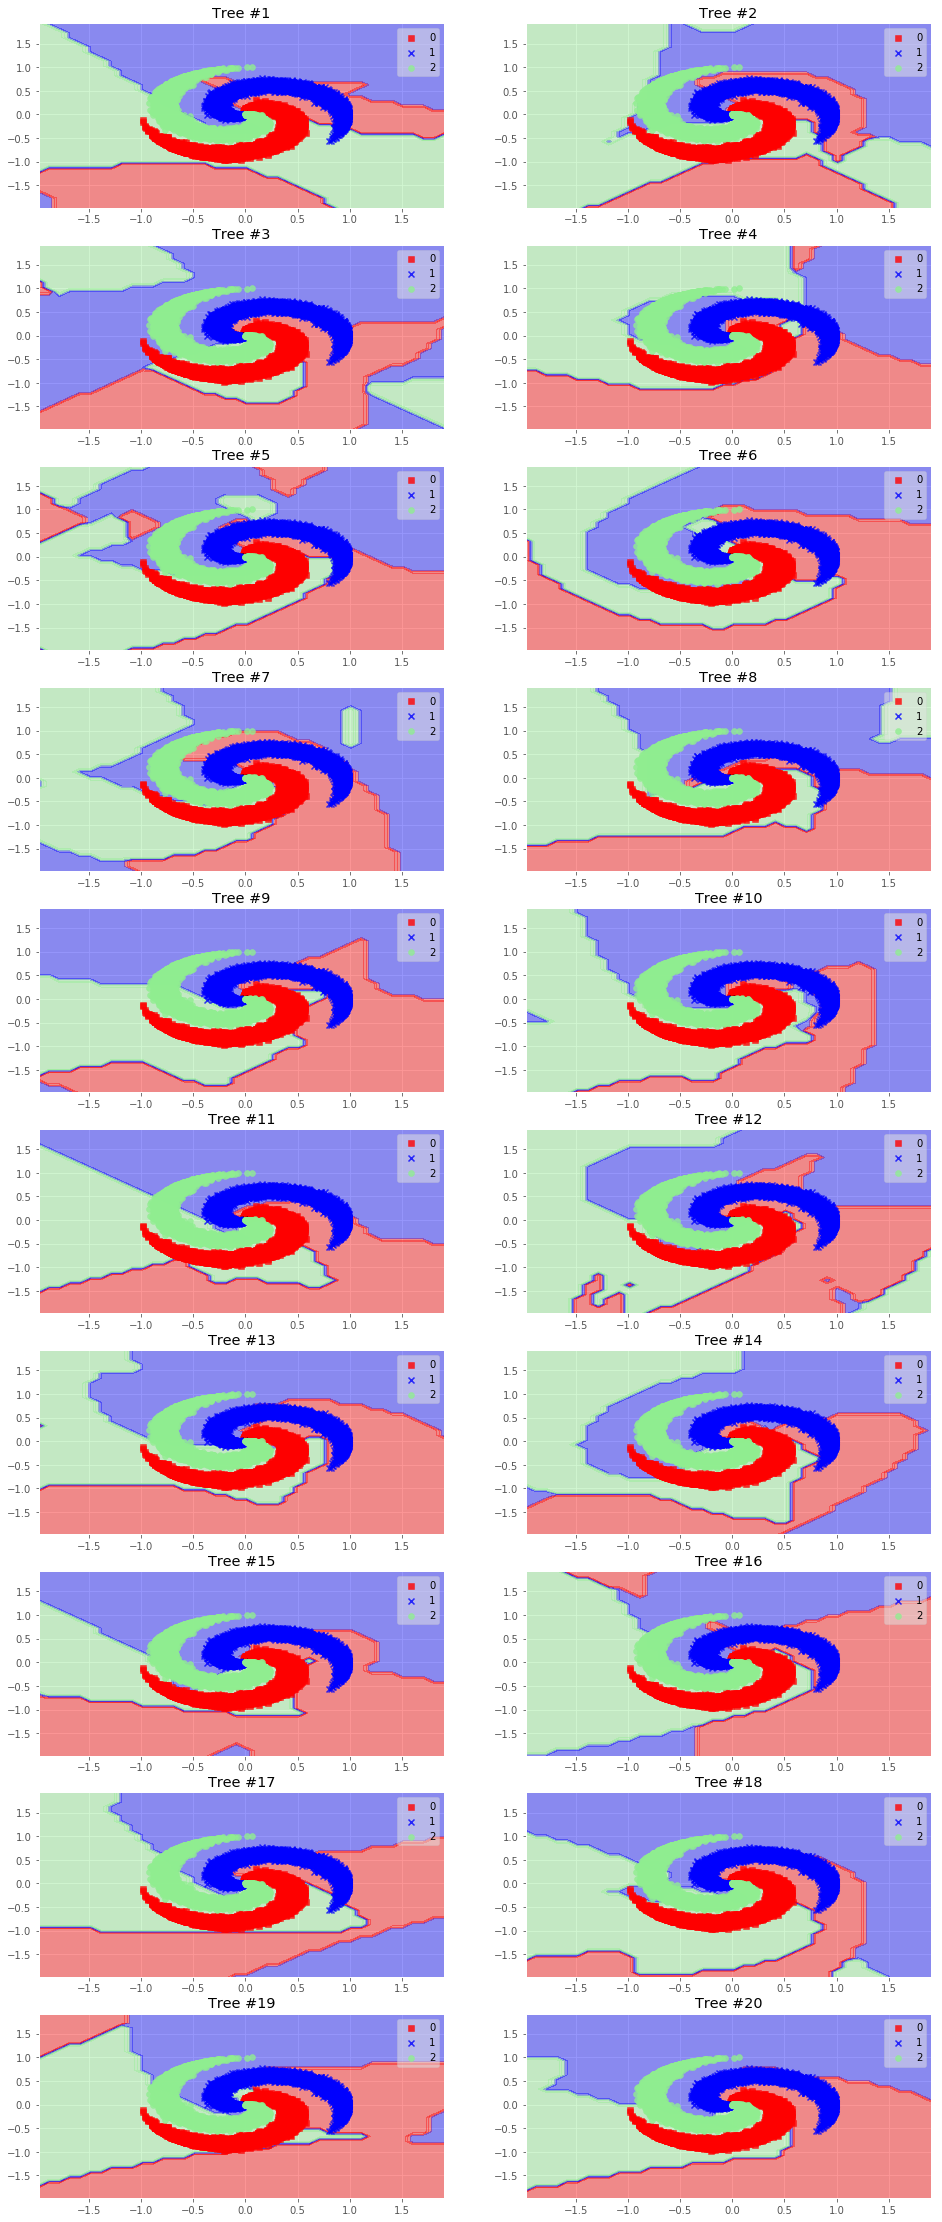

In [29]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i+1))
    i=i+1
plt.tight_layout

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

(30000, 2) (30000,)
Train Decision tree 1
Trees= 1  and Accuracy= 0.892733333333
Train Decision tree 1
Train Decision tree 2
Trees= 2  and Accuracy= 0.863533333333
Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Trees= 3  and Accuracy= 0.952133333333
Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Trees= 4  and Accuracy= 0.9684
Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decision tree 5
Trees= 5  and Accuracy= 0.958733333333
Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decision tree 5
Train Decision tree 6
Trees= 6  and Accuracy= 0.947933333333
Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decision tree 5
Train Decision tree 6
Train Decision tree 7
Trees= 7  and Accuracy= 0.972533333333
Train Decision tree 1
Train Decision tree 2
Train Decision tree 3
Train Decision tree 4
Train Decis

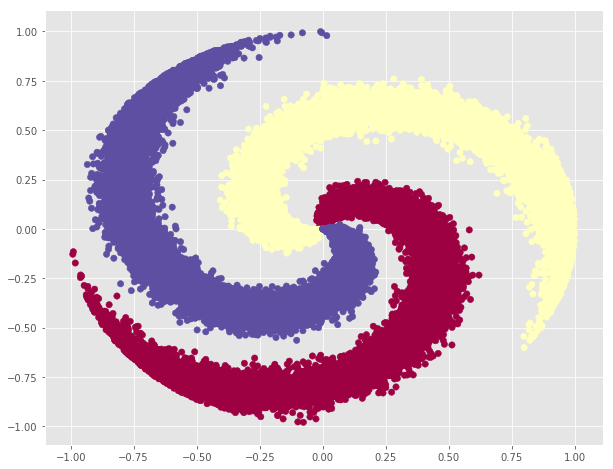

In [32]:
X,Y=t.get_spherical_data(N=10000)
print X.shape, Y.shape
Xtest,Ytest=t.get_spherical_data(N=5000)

trees = np.arange(1, 21)
Ytest = Ytest.reshape((Ytest.shape[0],1))
for tree in trees:
    rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=tree)
    rfc.train(X,Y[:,np.newaxis])

    Ypt=rfc.predict(Xtest)

    acc = np.sum(Ytest ==  np.array(Ypt)) / float(Ytest.shape[0]) 

    print "Trees=", tree, " and Accuracy=", acc
